<a href="https://colab.research.google.com/github/KARINAgoncalvesSOARES/Machine_Learning/blob/main/machinelearning_regresaolinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"><h2 align="center">Análise Exploratória de Dados </h2></h2>

Data Scientist Jr.: Karina Gonçalves Soares

Link de estudo:

* [Machine Learning: Regressão](https://github.com/EddyGiusepe/Machine_Learning/blob/main/3_ML_Regression.ipynb)


#Regressão Linear

A tarefa de REGRESSÃO consiste em encontrar uma função que nos permita predizer o valor de uma ou mais variáveis a partir de uma ou mais características (ou features). Um exemplo seria predizer o preço de uma casa a partir de seu número de habitações, metros quadrados, etc. O modelo mais simples para este tipo de tarefa é o modelo de Regressão Linear.
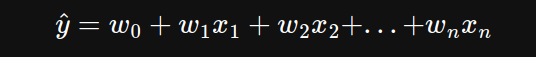

onde image.png é o valor predito, image.png parâmetros do modelo ou chamados pesos também (aqui também está incluso o bias image.png ),  image.png é o número de características (features) e image.png é a característica image.png Este modelo também é conhecido como PERCEPTRON, a base das REDES NEURONAIS. Treinar um modelo de Regressão Linear consiste em encontrar o conjunto de pesos,  image.png  que minimizem uma função de CUSTO. Neste caso de regressão linear, o Erro Quadrático Médio (MSE) é usado como medida de erro:

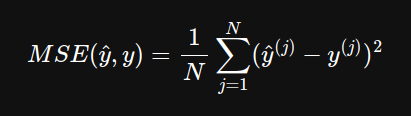

Onde image.png é o número de amostras em nosso conjunto de Dados, 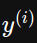 é o valor real, a etiqueta (ou ground truth) da amostra image.png

Vejamos um exemplo:

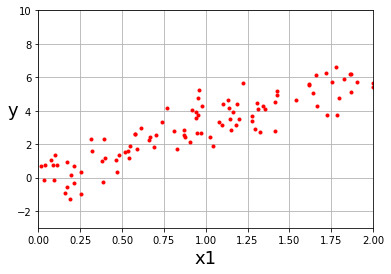

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = 2 * np.random.rand(100,1)
y = 3 * x + np.random.randn(100, 1)

plt.plot(x, y, "r.")
plt.xlabel('x1', fontsize = 18)
plt.ylabel('y', rotation =0, fontsize = 18)
plt.axis([0,2,-3,10])
plt.grid(True)
plt.show()

Neste caso temos apenas uma característica, x1, a partir da qual queremos predizer somente uma variável y (por exemplo o preço de uma casa em função de seus metros quadrados). Podemos usar o modelo de LinearRegression da biblioteca scikit-learn.

In [2]:
from sklearn.linear_model import LinearRegression

# Nosso modelo
lin_reg = LinearRegression()

# Ajustamos nosso modelo aos Dados
lin_reg.fit(x, y)

# Calculamos os coeficientes (as w_i)
lin_reg.intercept_, lin_reg.coef_# Bias (interceptar)

(array([0.08313969]), array([[3.06146729]]))

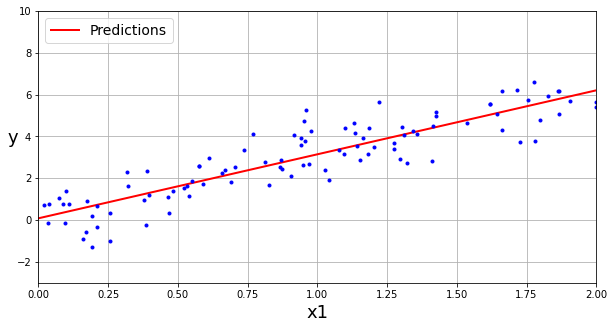

In [3]:
x_new = np.array([[0], [2]])  # Um novo Dado
# Logo fazemos a predição para esse novo Dado
y_predict = lin_reg.predict(x_new)

plt.figure(figsize = (10,5))
plt.plot(x_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(x, y, 'b.')
plt.xlabel('x1', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.grid(True)
plt.axis([0,2,-3,10])
plt.show()

Como pode ver, este modelo é muito simples, eficiente e explicável. No entanto, se nossos Dados não seguem uma tendência linear o resultado que obteremos não será bom.

# Regressão Polinomial

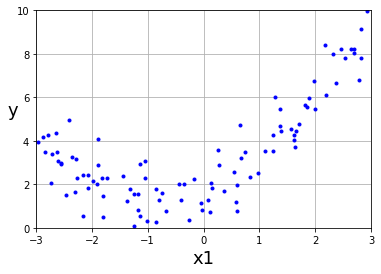

In [4]:
import numpy.random as  rnd
np.random.seed(42) # Isto é só para obter os mesmos resultados quando outro cientista reproduzir este script

m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1) 

plt.plot(x, y, 'b.')
plt.xlabel('x1', fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.axis([-3,3,0,10])
plt.grid(True)
plt.show()

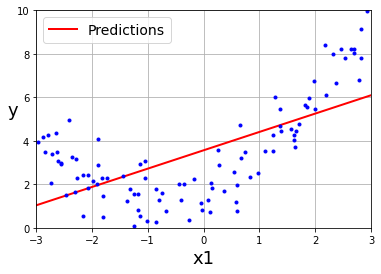

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(x,y)

x_new = np.array([[-3],[3]])
y_predict = lin_reg.predict(x_new)

plt.plot(x_new, y_predict, 'r-', linewidth=2, label="Predictions")
plt.plot(x, y, 'b.')
plt.xlabel('x1', fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3,3,0,10])
plt.grid(True)
plt.show()

Como observamos a RETA não se ajusta aos Dados. Então, para este conjunto de Dados podemos utilizar uma FUNÇÃO POLINOMIAL.

In [6]:

from sklearn.preprocessing import PolynomialFeatures

# Função polinomial de grau 2 (degree=2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# Aqui representaremos nosso Dado em outro espaço
# Ajuste aos dados e em seguida os transforma.
x_poly = poly_features.fit_transform(x)

# O X[0] é representado por X_poly[0] em outro espaço 
x[0], x_poly[0]
     

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

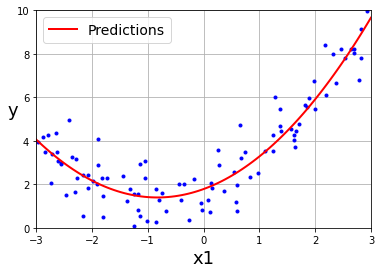

In [10]:
x_new = np.linspace(-3, 3, 100).reshape(100, 1)
x_new_poly = poly_features.transform(x_new)
y_new = lin_reg.predict(x_new_poly)

plt.plot(x,y, "b.")
plt.plot(x_new, y_new, 'r-', linewidth=2, label= "Predictions")
plt.xlabel('x1', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3,3,0,10])
plt.grid(True)
plt.show()

A nossa dúvida pode ser: Como sei de antemão se meus Dados seguem uma tendência Linear ou não (e mais no caso de trabalhar com múltiplas variáveis)? ... Não temos uma resposta simples, além de provar diferentes graus de polinômios e escolher aquele que der melhores resultados. Graças a scikit-learn podemos fazer isto de maneira simples.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

plt.figure(figsize=(10,6))
